In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

from scipy import stats
import statsmodels.api as sm 
import statsmodels.formula.api as sf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('../data/bayut/cleaned/ready_flats_valuation.csv')
df = df[(df['surface'] <= 4000)]
df['beds'] = df['beds'].astype(int)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27141 entries, 0 to 27140
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       27141 non-null  int64  
 1   URL              27141 non-null  object 
 2   building         15164 non-null  object 
 3   district         27141 non-null  object 
 4   neighborhood     26812 non-null  object 
 5   price            27141 non-null  int64  
 6   beds             27141 non-null  int32  
 7   baths            27141 non-null  int64  
 8   surface          27141 non-null  float64
 9   lat              27141 non-null  float64
 10  long             27141 non-null  float64
 11  highlights       27141 non-null  object 
 12  furnishing       15862 non-null  object 
 13  amenities        27141 non-null  object 
 14  completion_year  27141 non-null  int64  
 15  floor            731 non-null    float64
 16  price_sqf        27141 non-null  float64
 17  views       

In [4]:
# delete unnecessary columns and convert to correct types 

df = df.drop(['Unnamed: 0', 'URL', 'lat', 'long', 'highlights', 'amenities', 'furnished'], axis=1)

df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
# df['beds'] = df['beds'].astype('category')
# df['baths'] = df['baths'].astype('category')
df['furnishing'] = df['furnishing'].astype('category')
df['valuation'] = df['valuation'].astype('category')

df['views'] = df['views'].astype(bool)
df['discounted'] = df['discounted'].astype(bool)
df['cheap'] = df['cheap'].astype(bool)
df['cheap'] = df['cheap'].astype(bool)
df['distressed'] = df['distressed'].astype(bool)
df['investment'] = df['investment'].astype(bool)
df['tenanted'] = df['tenanted'].astype(bool)
df['vacant'] = df['vacant'].astype(bool)
df['metro'] = df['metro'].astype(bool)
df['condition'] = df['condition'].astype(bool)
df['luxury'] = df['luxury'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27141 entries, 0 to 27140
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   building         15164 non-null  object  
 1   district         27141 non-null  category
 2   neighborhood     26812 non-null  category
 3   price            27141 non-null  int64   
 4   beds             27141 non-null  int32   
 5   baths            27141 non-null  int64   
 6   surface          27141 non-null  float64 
 7   furnishing       15862 non-null  category
 8   completion_year  27141 non-null  int64   
 9   floor            731 non-null    float64 
 10  price_sqf        27141 non-null  float64 
 11  views            27141 non-null  bool    
 12  discounted       27141 non-null  bool    
 13  cheap            27141 non-null  bool    
 14  distressed       27141 non-null  bool    
 15  investment       27141 non-null  bool    
 16  tenanted         27141 non-null  bool   

In [5]:
# select columns
data = df[['beds', 'baths', 'surface', 'price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27141 entries, 0 to 27140
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   beds     27141 non-null  int32  
 1   baths    27141 non-null  int64  
 2   surface  27141 non-null  float64
 3   price    27141 non-null  int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 954.2 KB


In [6]:
data['price'] = data['price'] / 1000
data.describe()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2388\2493584975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'] / 1000


,beds,baths,surface,price
count,27141.000000,27141.000000,27141.000000,27141.000000
mean,1.681478,2.408128,1277.695055,2119.367124
std,0.879166,1.026082,590.998526,1970.346499
min,0.000000,0.000000,96.000000,190.000000
25%,1.000000,2.000000,831.000000,890.000000
50%,2.000000,2.000000,1171.000000,1600.000000
75%,2.000000,3.000000,1610.000000,2700.000000
max,5.000000,6.000000,4000.000000,35000.000000


In [7]:
# data.describe(include=['category'])

In [8]:
# Regression: price, surface, district, beds, baths
# One-hot encoding

# dataX = data[['surface', 'beds', 'price']]
# new_cols = pd.get_dummies(dataX[['beds']])
# dataX = dataX.drop(['beds'], axis=1)
# # merge dummy (new categorial) columns with original numerical columns
# data_new = pd.concat([dataX, new_cols], axis=1)
# data_new.head()

In [9]:
# data_new.info()

In [10]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=32)

Y_test = test_df["price"]
X_test = test_df.drop(columns= ["price"], axis = 1)
Y_train = train_df["price"]
X_train = train_df.drop(columns= ["price"], axis = 1)

def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

In [16]:
#let’s rename some things here to make this model more understandable
features = X_train.copy()
targets = Y_train.copy()

#defining the models we want to compare
#let's check out linear, elastic net, and random forest

models = [
          LinearRegression(),
          RidgeCV(),
          LassoCV(),
          ElasticNetCV(),
          RandomForestRegressor()
]

#setting up the instructions for our comparison tool

#Number of cross validation to performs, 5 is standard number
CV = 10
#creating our cross validation data frame
cv_df = pd.DataFrame(index=range(CV * len(models)))
#empty initial list for entries in our dataframe
entries = []
#outer for loop to execute our cross validations of the above models
for model in models:
  #accessing model information class
  model_name = model.__class__.__name__
  #getting parameters of model to calculate R2
  accuracies = cross_val_score(model, features, targets, scoring='r2', cv=CV)
  #inner for loop to fill the entries list to build the ending dataframe
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    #finalizing the dataframe with appended entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'r2'])

<IPython.core.display.Javascript object>


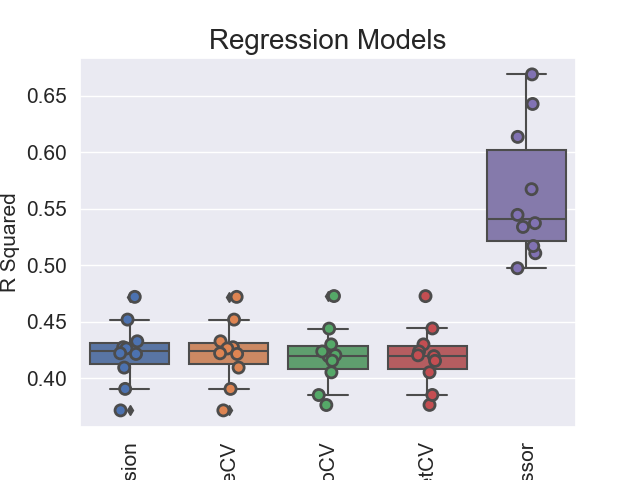

In [17]:
#visualizing the results
sns.boxplot(x='model_name', y='r2', data=cv_df)
sns.stripplot(x='model_name', y='r2', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Regression Models', fontsize=20)
plt.ylabel('R Squared', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.show()

In [18]:
# 11 hours

# RandomForestRegressor(n_estimators=100, *, criterion='squared_error', 
# max_depth=None, min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
# min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, 
# random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

# grid = {
#     'n_estimators' : [50,100,200,500],
#     'criterion' : ['squared_error', 'absolute_error', 'poisson'],
#     'max_depth': [2, 3, 4, 5]
# }

# regressor = RandomForestRegressor(random_state=32)

# grid_apply = GridSearchCV(regressor, grid, scoring='r2', cv=5, refit=True, verbose=2)

# features = X_train.copy()
# targets = Y_train.copy()

# #takes a lot of time
# grid_apply.fit(features, targets)

# #looking at the best outcome scenario in terms of r squared
# best_perf = grid_apply.best_score_

# #looking for the best parameters to utilize
# best_model = grid_apply.best_estimator_

# #printing out best score results for our model
# print("Best R Squared = " + str(best_perf))
# print("Best Parameters: " + str(best_model))

In [19]:
# Best R Squared = 0.47860339230234994
# Best Parameters: RandomForestRegressor(max_depth=5, n_estimators=50, random_state=32)

In [21]:
rf = RandomForestRegressor(n_estimators=50, random_state=32)
rf_fit = rf.fit(X_train, Y_train)
yhat_rf = rf_fit.predict(X_test)

error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 733.9939552513235',
 'Mean Square Error: 1799195.8988798058',
 'r2 score: 0.5227694179003282')

In [22]:
act_pred_comp = pd.DataFrame({"Actual":Y_test, "Pred":yhat_rf})
act_pred_comp['Diff'] = np.abs(act_pred_comp['Actual'] - act_pred_comp['Pred'])
act_pred_comp.describe()

,Actual,Pred,Diff
count,8143.000000,8143.000000,8143.000000
mean,2125.423234,2164.709781,733.993955
std,1941.787770,1731.961655,1122.766040
min,200.000000,279.613333,0.000000
25%,880.000000,1054.426643,159.996828
50%,1600.000000,1735.816550,403.572092
75%,2702.825000,2735.090100,896.276317
max,35000.000000,26266.095238,28135.683600
